# TinyTimeMixer Usage Example

## Loading TinyTimeMixer Model

In [1]:
import os 
import sys
import torch
import numpy as np


from samay.model import TinyTimeMixerModel
from samay.dataset import TinyTimeMixerDataset
from samay.utils import load_args

arg_path = "../config/tinytimemixer.json"
args = load_args(arg_path)
ttm = TinyTimeMixerModel(**args)

## Define the datasets

In [2]:
train_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', 
                             mode='train', batch_size=64, context_len=512, horizon_len=96)
val_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='test', batch_size=64, context_len=512, horizon_len=96)

## Evaluate the zero-shot forecasting

In [3]:
metrics = ttm.evaluate(val_dataset)
print(metrics)

(462, 7, 96) (462, 7, 96) (462, 7, 512)
{'mse': 9.531482, 'mae': 1.6833216, 'mase': 1.7621224, 'mape': 1049.9802, 'rmse': 3.0873098, 'nrmse': 0.06723380847098956, 'smape': 0.4409384, 'msis': 0.05309491, 'nd': 0.4522242285302642}


## Visualization of the evaluation

(462, 7, 512)


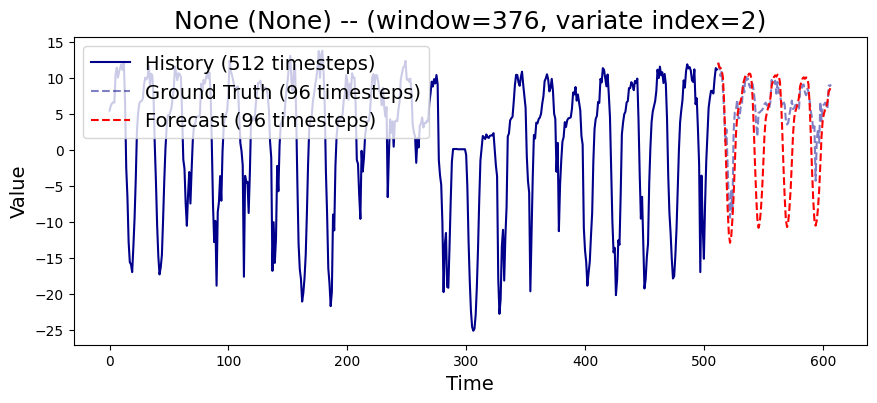

In [4]:
ttm.plot(val_dataset)

## Finetune TinyTimeMixer Model on the ETT dataset

In [5]:
finetuned_model = ttm.finetune(train_dataset)

Epoch 0, Loss: 5.714398750892053
Epoch 1, Loss: 5.510728175823505
Epoch 2, Loss: 5.437995580526499
Epoch 3, Loss: 5.371856836172251
Epoch 4, Loss: 5.339195764981783


## Test the Finetuned Model

In [6]:
metrics = ttm.evaluate(val_dataset)
print(metrics)

(462, 7, 96) (462, 7, 96) (462, 7, 512)
{'mse': 9.433637, 'mae': 1.6795125, 'mase': 1.7581352, 'mape': 1085.6228, 'rmse': 3.0714226, 'nrmse': 0.06688782407628086, 'smape': 0.43662193, 'msis': 0.053788815, 'nd': 0.4512009155789655}


(462, 7, 512)


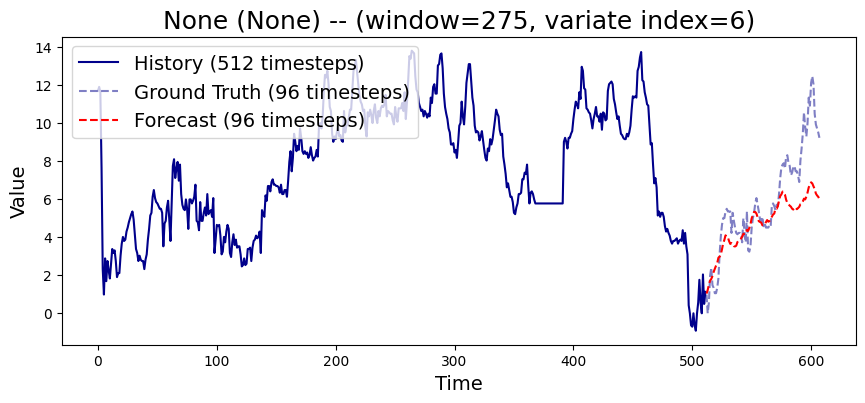

In [7]:
ttm.plot(val_dataset)